In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import time
import math
from time import process_time
from numba import jit

In [2]:
x = np.arange(0, 10, 0.001)# testing using a a sine wave
v = np.sin(x)

In [9]:
# points used to plote the sine wave is
len(x)

10000

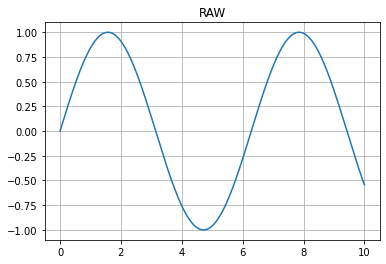

In [15]:
#ploting the sine wave 
plt.grid(True)
plt.title('RAW')
plt.plot(x, v)

In [4]:
# function used to reduce the points to plot without loosing the actual shape of the signal
@jit
def compress(v,x,slope =1.2999632755666957e-02):
    l = len(v)
    vcmp = []
    xcmp = []
    m1 = 0
    m2 = 0
    vcmp.append(v[0])
    xcmp.append(x[0])
    for i in range(1,l-l%3):
        m = abs(2*v[i] - v[i-1] - v[i+1])
        #angle = abs(math.atan(m1) - math.atan(m2))
        # print(f"instant:  {i}, change:{m1-m2}")
        #print(m)
        if(m >= slope):
            vcmp.append(v[i])
            xcmp.append(x[i])
            #print(m)
            
    end = l-(l%3)
    for j in range(end, l):
        vcmp.append(v[j])
        xcmp.append(x[j])
    return vcmp,xcmp

In [6]:
# ralizing the above function using the sine wave given above
start = process_time()
vcmp , xcmp = compress(v,x,7.2999632755666957e-07)
end = process_time()
print(f"time taken is: {-start + end}")

time taken is: 0.0012432769999994875


In [16]:
# POINTS AFTER REDUCING POINTS
len(vcmp)

4517

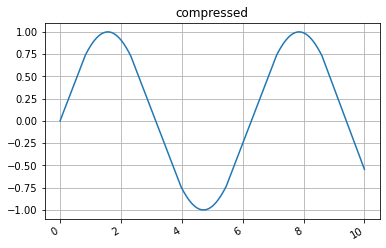

In [14]:
# polot the sine wave after reducing the points
plt.grid(True)
plt.plot(xcmp,vcmp)
plt.title("compressed")
plt.gcf().autofmt_xdate()
plt.show()